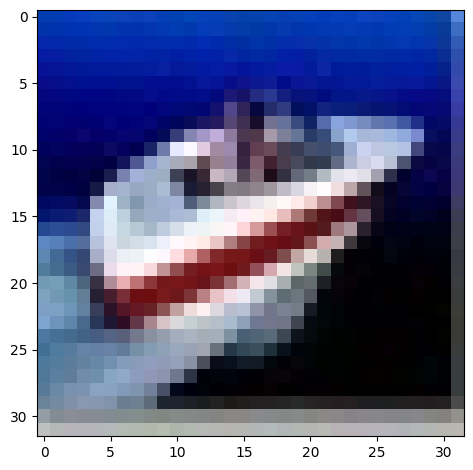

[ 21.777779     7.3333335    0.7777778    8.444445     3.5555556
   4.111111     1.7777778    6.888889    73.888885    23.88889
   5.7777777    5.888889     2.           1.4444444    9.444445
  49.22222     63.11111     18.777779    10.666667    26.11111
  21.222221     9.222222    11.333333    49.77778     24.555555
   5.6666665   12.333333    37.666668    51.22222     27.555555
  11.444445    24.444445    36.555557     5.6666665    1.6666666
  10.555555     7.3333335   15.           2.4444444    6.4444447
  90.44444     26.333334    18.444445    38.333332    25.555555
  11.777778     5.4444447   40.11111    109.22222     33.
  18.444445    33.22222     41.11111     15.777778    22.777779
  60.          42.88889      3.2222223    4.          39.555557
  81.          37.88889     27.          43.333332    28.
  15.666667     5.6666665   16.222221     7.4444447    3.8888888
   2.5555556    7.6666665  103.77778     45.77778     14.555555
  29.666666    20.777779    21.333334    13.444445

In [11]:
'''import cv2
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline


def get_sift_feature(im):
    """
    Extract the SIFT features from an input image.

    Parameters:
        im (numpy.ndarray): An input image in float32 format with shape (H, W, 3).

    Returns:
        A 1D array of the mean of the SIFT descriptors. If no descriptors are found,
        returns a zero array of length 128.
    """
    gray_im = color.rgb2gray(im)
    sift = cv2.SIFT_create()
    _, descriptors = sift.detectAndCompute((gray_im * 255).astype("uint8"), None)
    if descriptors is None:
        return np.zeros((128,))
    return np.mean(descriptors, axis=0)



img = cv2.imread("/Users/aatmiya/Desktop/HKU/Year 2 Sem 2/COMP3314/Assignments/A3/comp3314-assignment-3-image-classification/test_ims/d6bae8f.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


img1 = io.imread("/Users/aatmiya/Desktop/HKU/Year 2 Sem 2/COMP3314/Assignments/A3/comp3314-assignment-3-image-classification/test_ims/d6bb10e.jpg")
io.imshow(img1)
io.show()
print(get_sift_feature(img1))'''

In [1]:
import os

# Get the directory path
directory_path = "/Users/aatmiya/Desktop/HKU/Year 2 Sem 2/COMP3314/Assignments/A3/data/train_ims"

# List filenames in alphabetical order
filenames = sorted(os.listdir(directory_path))

In [16]:
import pandas as pd
from skimage import io
#from skimage.feature import SIFT, SURF
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

train_images = []
train_df = pd.read_csv("/Users/aatmiya/Desktop/HKU/Year 2 Sem 2/COMP3314/Assignments/A3/data/train.csv")
labels = train_df["label"].to_numpy()[:100]
print(labels)


for i in range(100):
    image = io.imread(f"{directory_path}/{filenames[i]}")
    train_images.append(image)

print(train_images)

[6 2 1 3 4 5 7 6 0 6 3 3 9 7 4 1 1 7 1 8 6 8 2 2 0 4 0 7 1 6 3 4 6 1 5 6 5
 8 4 2 4 0 4 9 8 6 1 8 6 9 6 1 7 6 6 8 7 8 8 6 1 0 4 9 8 4 9 3 3 2 4 7 5 1
 1 5 6 7 1 7 5 8 6 3 6 2 9 1 7 9 0 2 7 3 4 2 1 9 3 6]
[array([[[237, 242, 246],
        [238, 246, 249],
        [228, 239, 241],
        ...,
        [ 28,  62,  25],
        [ 33,  66,  35],
        [ 32,  67,  37]],

       [[238, 245, 251],
        [227, 238, 242],
        [220, 234, 237],
        ...,
        [ 32,  66,  29],
        [ 26,  60,  27],
        [ 25,  60,  28]],

       [[209, 222, 228],
        [198, 216, 220],
        [191, 210, 214],
        ...,
        [ 36,  71,  29],
        [ 38,  72,  35],
        [ 29,  63,  28]],

       ...,

       [[177, 205, 219],
        [167, 196, 210],
        [155, 189, 199],
        ...,
        [117, 156, 161],
        [131, 172, 166],
        [ 84, 127, 117]],

       [[171, 197, 210],
        [163, 191, 203],
        [143, 177, 186],
        ...,
        [107, 145, 148],
        [